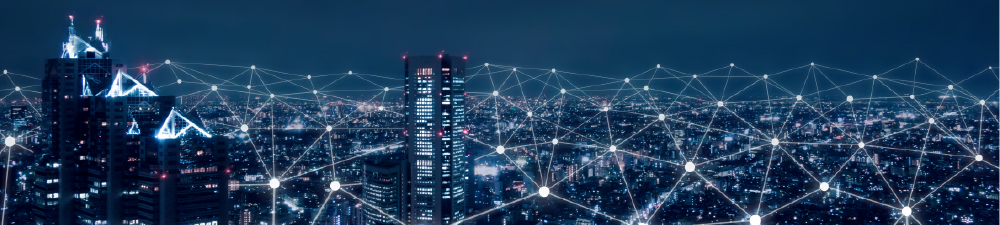

# Mini Project 3  - IU 4.6 Machine Learning

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as sklm
from sklearn import feature_selection as fs
from sklearn import metrics
import sklearn.model_selection as ms

from scipy.stats import shapiro
import scipy.stats as stats
%matplotlib inline

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option("display.max_columns", None)

## Reading data and initial processing

In [2]:
#edit the file location of raw data set
cust_df=pd.read_csv("Mini_project_3_Data.xls")
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


## Exercise

## Placeholder for your analysis

In [3]:
# Type your code here to explore and understand the data better
# check duplicated value in dataframe
print("Total Duplicate :",cust_df["CustomerID"].duplicated().sum(),"\n")

# check missing value
print("Total Missing Value:",cust_df.isna().values.sum(),"\n")

# check for total row with missing value
print("Total Missing Row:",cust_df.isna().any(axis = 1).sum(),"\n")

# check dataframe of dataframe
print("Dataframe Dimension :",cust_df.shape,"\n")

# dataframe info
print(cust_df.info())

Total Duplicate : 0 

Total Missing Value: 3515 

Total Missing Row: 1295 

Dataframe Dimension : (51047, 58) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  flo

In [4]:
# see the dataframe metrics
cust_df.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,4.085672,28.288981,1.868999,0.298838,114.800121,25.377715,8.178104,90.549515,67.650790,10.158003,0.012277,1.840504,18.756264,1.532157,1.354340,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,10.946905,38.876194,5.096138,1.168277,166.485896,35.209147,16.665878,104.947470,92.752699,15.555284,0.594168,5.585129,9.800138,1.223384,0.675477,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,0.000000,5.300000,0.000000,0.000000,8.300000,3.300000,0.000000,23.000000,11.000000,1.700000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,1.000000,16.300000,0.000000,0.000000,52.800000,13.700000,2.000000,62.000000,35.700000,5.300000,0.000000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,3.700000,36.300000,1.700000,0.300000,153.500000,34.000000,9.300000,121.300000,88.700000,12.300000,0.000000,1.300000,24.000000,2.000000,2.000000,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,384.300000,848.700000,327.300000,66.000000,2692.400000,644.300000,519.300000,2090.700000,1474.700000,411.700000,81.300000,212.700000,61.000000,196.000000,53.000000,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [5]:
# upon checking the dateframe, we found unknown value and 0 value
check = cust_df[cust_df == "Unknown"].any()

for k,v in check.items():
    if v == True:
        print(k,v)

Homeownership True
HandsetPrice True
MaritalStatus True


In [6]:
# number of zero value in age columns HH1 and HH2
len(cust_df["AgeHH1"][cust_df["AgeHH1"] == 0])

len(cust_df["AgeHH2"][cust_df["AgeHH2"] == 0])

13917

26087

After careful examined the data we found "Unknown" in home ownership is categorical value, but is a missing value in both handset price and marital status

In [7]:
# Replace the unknown value to null value for further process
cust_df["HandsetPrice"] = cust_df["HandsetPrice"].replace("Unknown" , np.nan)
cust_df["MaritalStatus"] = cust_df["MaritalStatus"].replace("Unknown" , np.nan)

cust_df["AgeHH1"] = cust_df["AgeHH1"].replace(0 , np.nan)
cust_df["AgeHH2"] = cust_df["AgeHH2"].replace(0 , np.nan)

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [8]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
zero_rev = cust_df[cust_df.MonthlyRevenue == 0]
zero_rev
print("Customer with zero or negative monthly revenue :",len(zero_rev))

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
12262,3096670,Yes,0.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,2,2,NMXELP915,2.0,2.0,597.0,NaN,NaN,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,30,No,5-Low,Suburban,Other,NaN
13127,3103410,Yes,0.0,55.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.3,5.3,0.0,7.1,0.7,0.7,11.3,2.0,0.0,0.0,0.0,26,2,2,SANSAN210,3.0,3.0,371.0,28.0,30.0,No,No,Yes,No,No,Unknown,No,Yes,No,No,No,Yes,0,0,No,Yes,0,4,No,0,10,No,4-Medium,Other,Other,NaN
42051,3334666,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,2,2,OKCOKC405,1.0,1.0,307.0,NaN,NaN,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,Yes,0,0,No,0,NaN,No,5-Low,Other,Other,NaN
49920,3391282,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59,2,2,NEVCHU619,2.0,2.0,866.0,26.0,NaN,No,No,No,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,4,No,1,30,No,1-Highest,Suburban,Other,Yes
49946,3391442,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,55,1,1,NEVOCN760,1.0,1.0,1671.0,42.0,36.0,No,No,No,No,No,Known,No,No,No,No,No,No,0,0,No,No,0,5,No,0,NaN,No,1-Highest,Other,Other,NaN
51035,3399894,No,0.0,76.0,30.0,0.0,0.0,0.0,0.0,0.0,5.7,1.0,13.0,0.7,0.0,11.2,5.7,0.0,29.3,17.0,6.7,0.0,0.0,30,1,1,NEVELC619,1.0,1.0,883.0,48.0,48.0,Yes,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,No,No,0,4,No,0,NaN,No,2-High,Other,Professional,No


Customer with zero or negative monthly revenue : 6


In [9]:
# Drop 0 revenue customers
cust_df.drop(zero_rev.index , inplace = True)
cust_df.shape

(51041, 58)

### Q1.2 How many columns has missing values percentage > 5%

In [10]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?

missing_value = round(cust_df.isnull().sum()*100/ len(cust_df),2)

for k,v in missing_value.items():
    if v != 0:
        print(f"{k: <21} ", f" {v: >10}")

MonthlyRevenue                0.31
MonthlyMinutes                0.31
TotalRecurringCharge          0.31
DirectorAssistedCalls         0.31
OverageMinutes                0.31
RoamingCalls                  0.31
PercChangeMinutes             0.72
PercChangeRevenues            0.72
ServiceArea                   0.05
AgeHH1                       29.04
AgeHH2                       52.88
HandsetPrice                 56.78
MaritalStatus                38.59


<mark>__Result:__
    
There is 2 columns have unknown value with 56.78% and 38.59% respectively, we will drop it since it will bring no value for analysis <br>
There rest of the columns will impute with median number for numeric columns and mode for string columns

In [11]:
# drop unwanted columns
drop_list = ["CustomerID", "MaritalStatus", "HandsetPrice", "AgeHH1", "AgeHH2", "DroppedCalls", "BlockedCalls"]

cust_df = cust_df.drop(drop_list ,axis = 1)
cust_df.shape

(51041, 51)

Drop the customer id and columns with more than 5% misssing data since too many missing data bring no values for analyst<br>
As per dropped calls and  blocked calls, there is anonther columns "DroppedBlockedCalls" is the summation of the two column so we dropped the others two

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

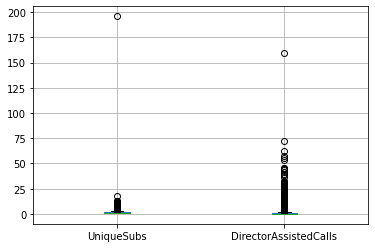

In [12]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols);

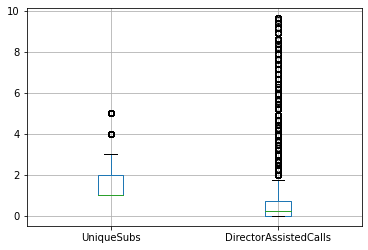

In [13]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers
uniquesubs_outlier = cust_df.UniqueSubs.quantile(0.99)
dir_assist_call_outlier = cust_df.DirectorAssistedCalls.quantile(0.99)

cust_df = cust_df[(cust_df.UniqueSubs <= uniquesubs_outlier) & (cust_df.DirectorAssistedCalls <= dir_assist_call_outlier)]
cust_df.shape

cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols);

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='OverageMinutes', ylabel='MonthlyRevenue'>

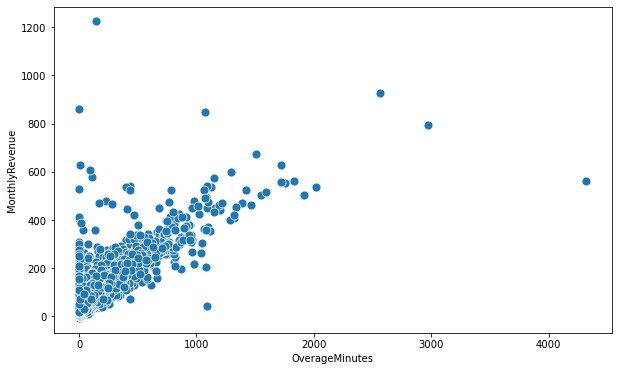

Correlation : 0.78


In [14]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'OverageMinutes', y = 'MonthlyRevenue', data = cust_df, s = 80)
plt.show();

# calculate the realtionship between 2 variable
print("Correlation :",round(cust_df.OverageMinutes.corr(cust_df.MonthlyRevenue),2))

Relationship between mothly revenue and overage minutes are strong positive with correlation 0.78

<mark>__Result:__
    
Type your interpretation here based on the scatter plot analysis

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

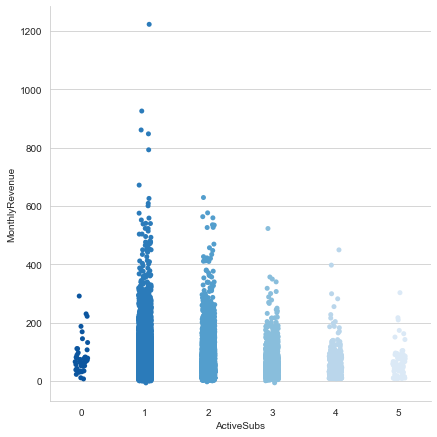

In [15]:
#use category plot to plot monthly revenue for each active subs category
sns.set_style("whitegrid")
sns.catplot(x = "ActiveSubs" , y = "MonthlyRevenue", data = cust_df, palette = "Blues_r", size = 6);

<mark>__Result:__
    
From the chart above we can cleary see there is a trend <br>
higher the active sub,lower the monthly revenue

### Q2.3 Does credit rating have an impact in churn rate?

In [16]:
# calculate the churn rate for plotting
churn_cnt = cust_df.copy()
churn_cnt["Churn_Indicator"] = np.where(churn_cnt["Churn"] == "Yes",1,0)

grp = churn_cnt[["CreditRating","Churn_Indicator"]].groupby(["CreditRating"]).apply(lambda r: (r.sum()/len(r)*100).round(2))
grp

,Churn_Indicator
CreditRating,
1-Highest,30.76
2-High,30.06
3-Good,31.03
4-Medium,26.02
5-Low,21.89
6-VeryLow,26.96
7-Lowest,28.87


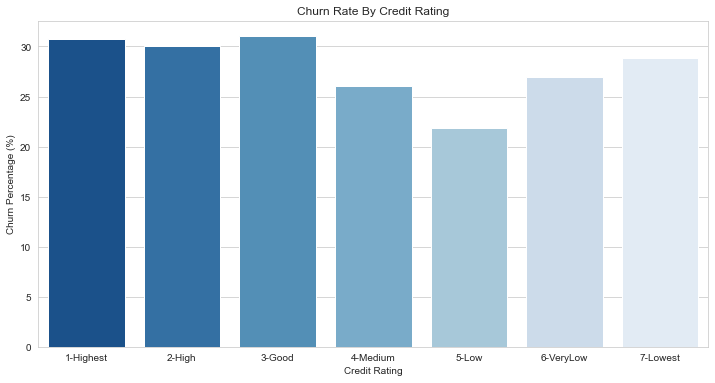

In [17]:
# visualize the churn rate and observe the relationship between churn and crdit rating
plt.figure(figsize = (12,6))
ax = sns.barplot(x = grp.index , y = grp.values.ravel(), palette = ("Blues_r"))
ax.set(xlabel = "Credit Rating", ylabel = "Churn Percentage (%)", title = "Churn Rate By Credit Rating")
plt.show();

<mark>__Result:__
    
From the chart above we can see some impact of credit rating to churn rate <br>

### Placeholder for additional exploratory analysis

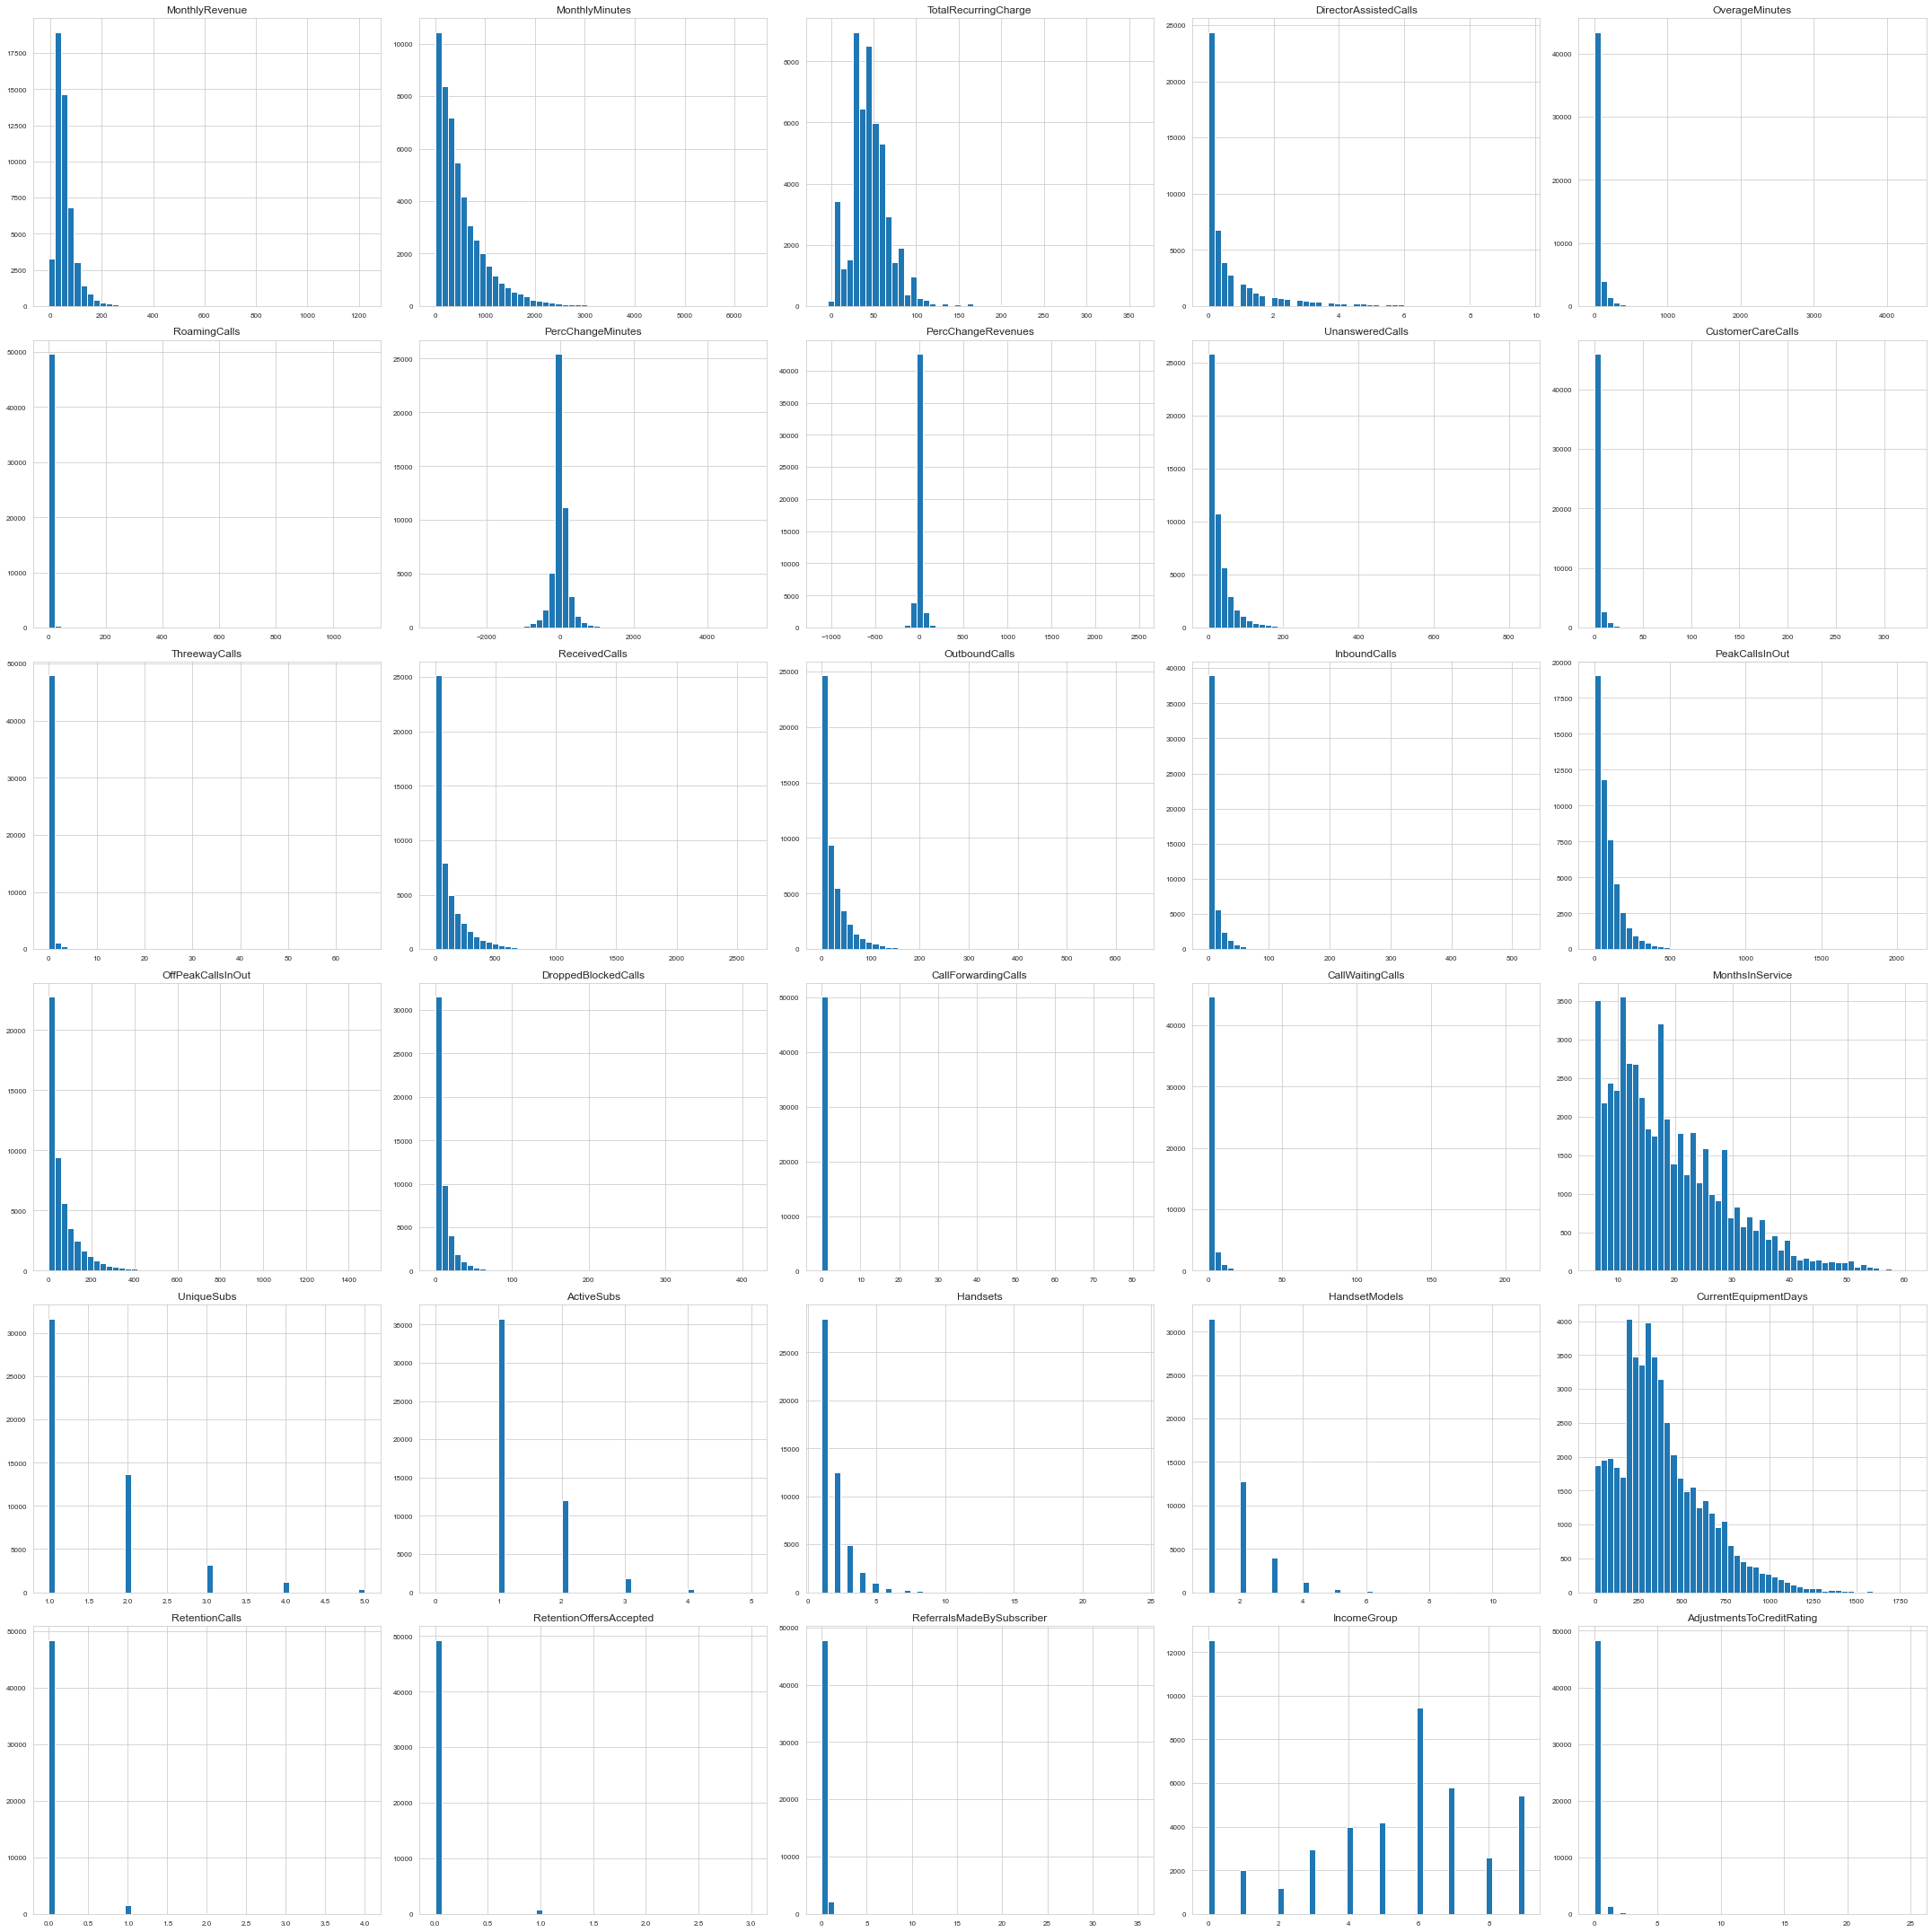

In [18]:
featues_dist = cust_df.select_dtypes(include = ["float64","int64"])

featues_dist.hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8)
plt.tight_layout();

Checking the distribution of the numeric features

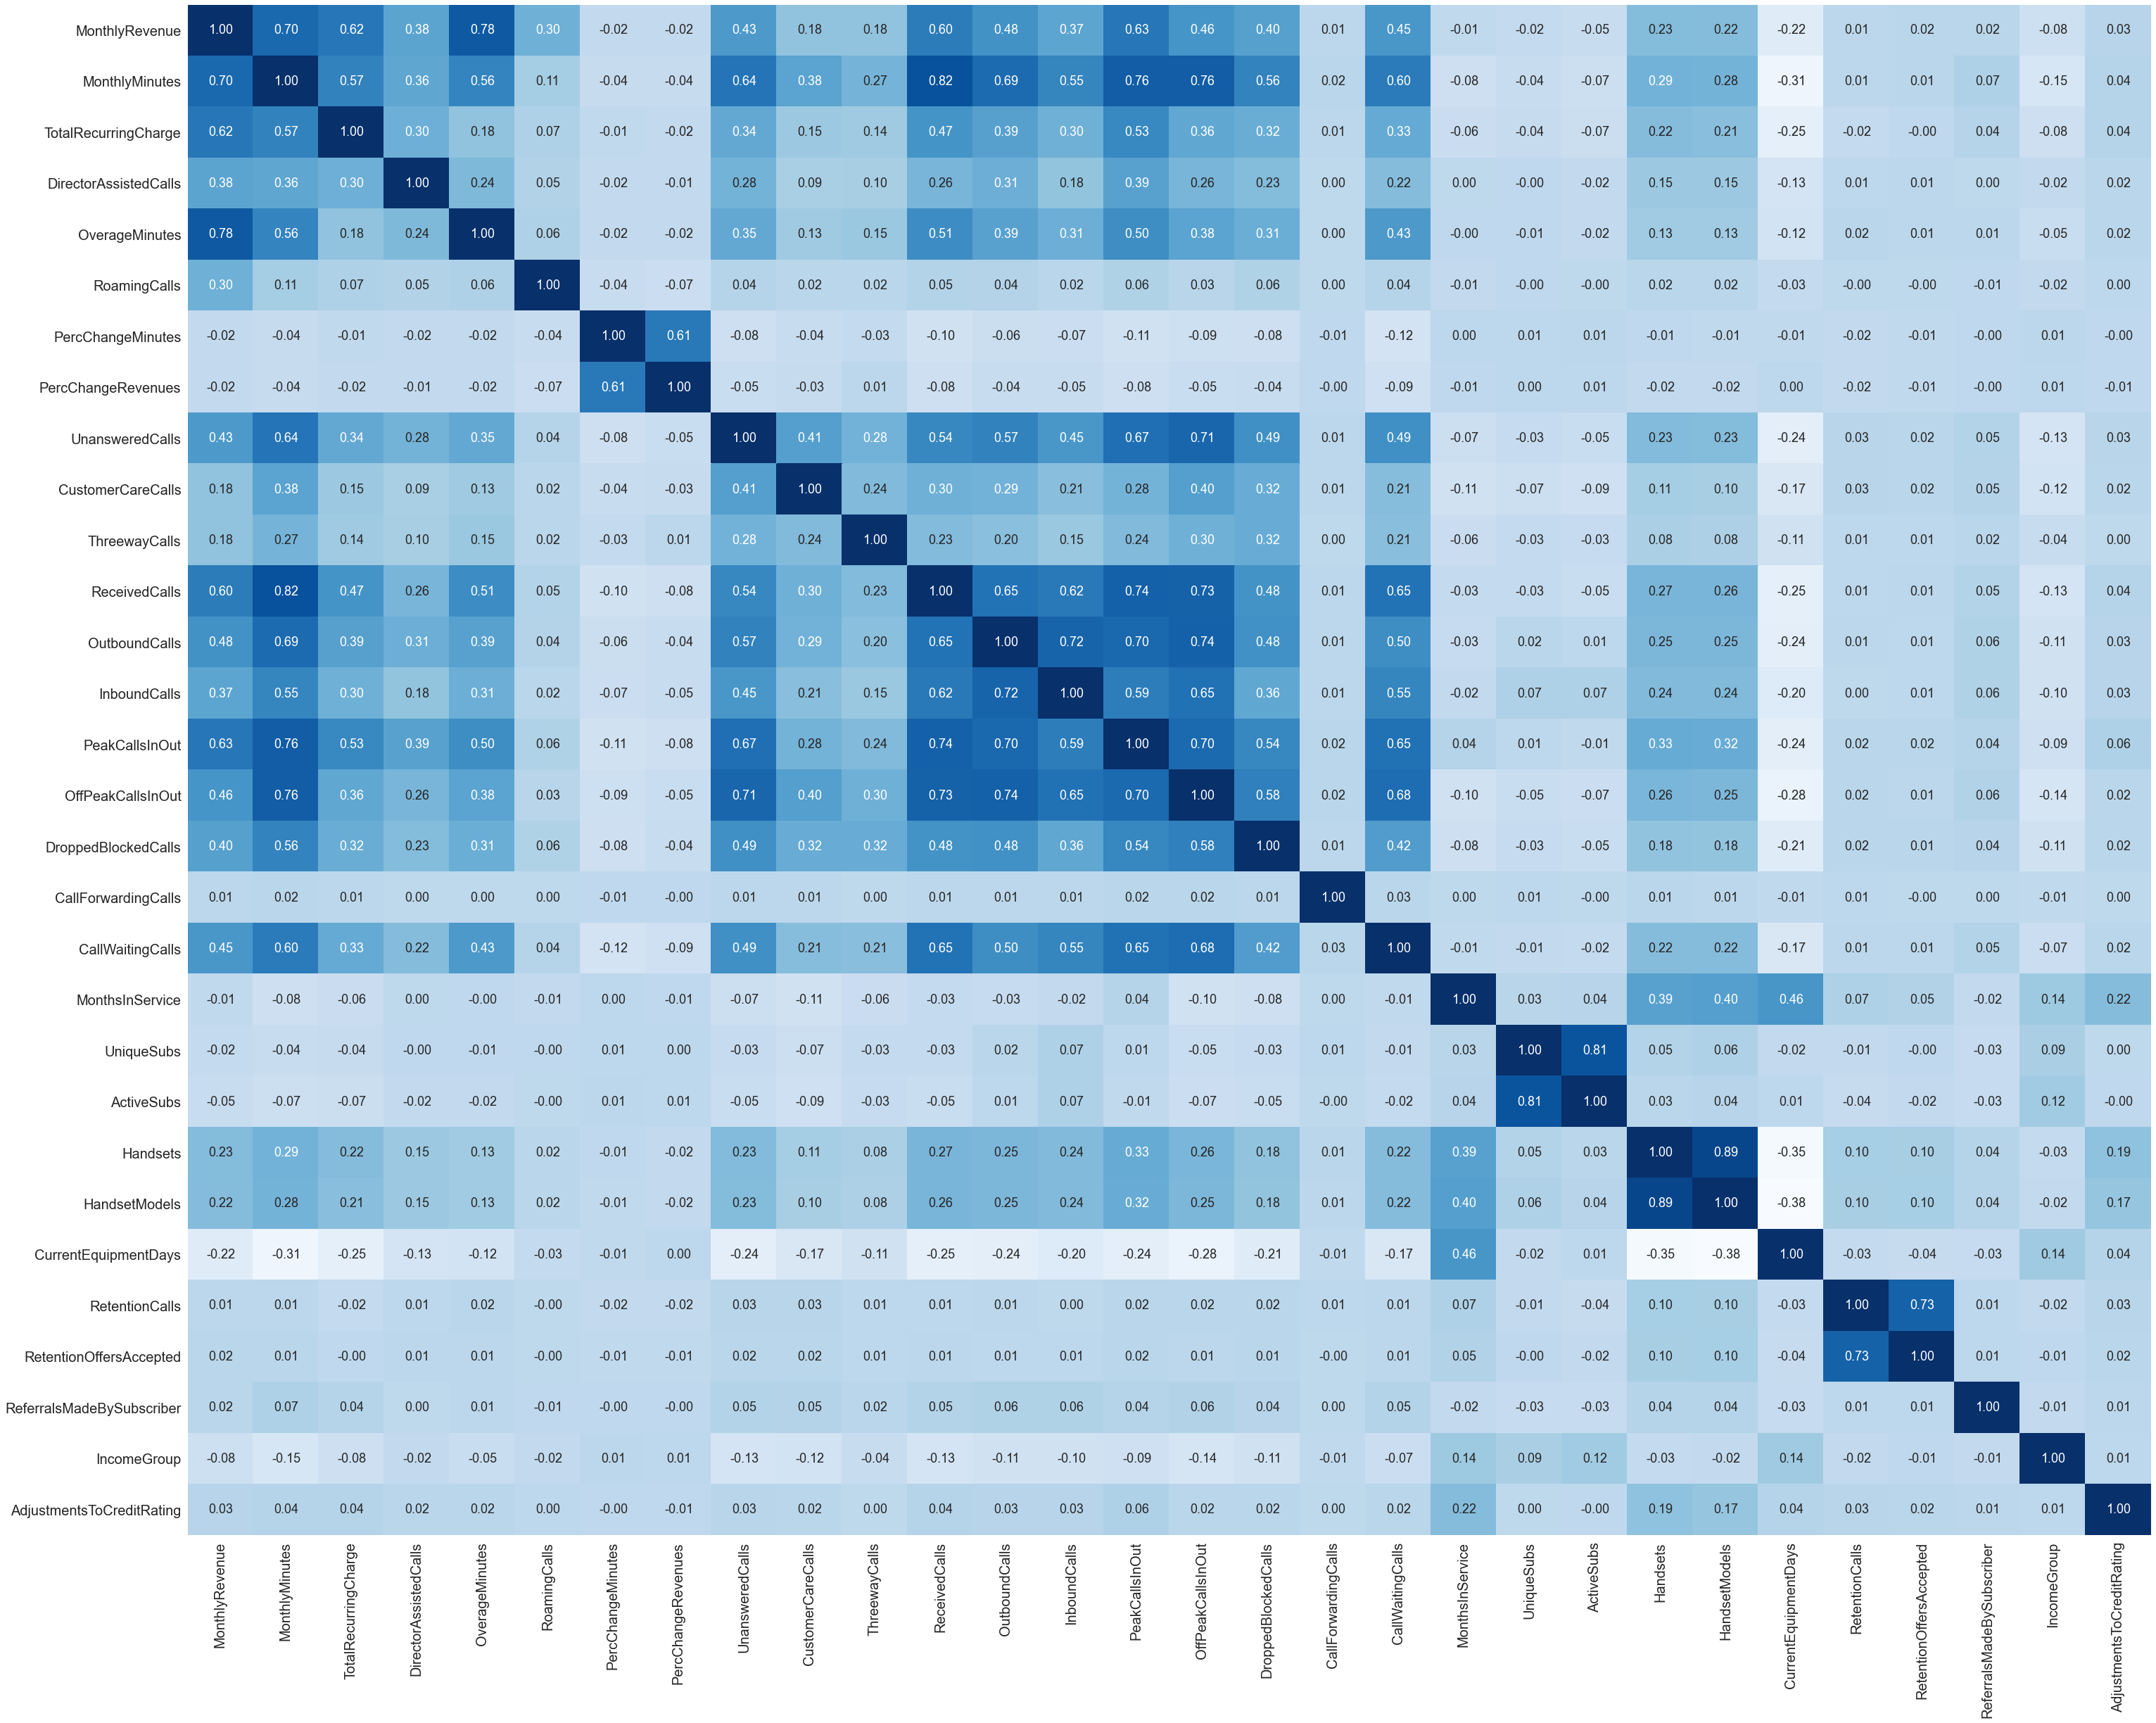

In [19]:
#type your code here for any additional exploratory analysis (if any)
plt.figure(figsize= (50,40))
sns.set(font_scale = 1.5)
sns.heatmap(cust_df.corr() , annot = True,cbar = False, fmt = ".2f",
            xticklabels = True, yticklabels = True, cmap="Blues")

plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.show();

From the correlation heatmap above, we found high corrlation relationship between handset and handset model with 0.89<br>

In [20]:
# drop one of the columns with high correlation
cust_df = cust_df.drop("HandsetModels", axis =1)
cust_df.shape

(50167, 50)

### FIll the missing value

In [21]:
# fill missing value
nan_col = cust_df.columns[cust_df.isnull().any() == True]

for i in nan_col:
    if cust_df[i].dtype == "float64":
        cust_df[i] = cust_df[i].fillna(cust_df[i].mean())
    else:
        cust_df[i] = cust_df[i].fillna(cust_df[i].mode()[0])

In [22]:
# check again the null value
cust_df.isna().sum().sum()

0

## Q3. Create additional features to help predict churn

In [23]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge'] = cust_df["TotalRecurringCharge"] / cust_df["MonthlyRevenue"]  
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    cust_df["perc_overage_minutes"] = cust_df["OverageMinutes"] / cust_df["MonthlyMinutes"]
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    
    return cust_df  


In [24]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)
cust_df.head(2)
cust_df.shape

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,CurrentEquipmentDays,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,361.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,Yes,1-Highest,Suburban,Professional,0.5,0.916667,0.0
1,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1504.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,No,4-Medium,Suburban,Professional,1.0,1.000589,0.0


(50167, 53)

In [25]:
# check for new columns missing value
new_missing = cust_df.isnull().sum()

for k, v in new_missing.items():
    if v != 0:
        print(k,v)

perc_overage_minutes 717


In [26]:
# fill the missing value with 0
cust_df["perc_overage_minutes"].fillna(0, inplace = True)
cust_df.isnull().sum().sum()

0

## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [27]:
#Create dummy variables for all categorical variables
#X = pd.get_dummies(X)
le = LabelEncoder()

cols_list = cust_df.select_dtypes(include = "object").columns
cols_list

for name in cols_list:
    cust_df[name] = le.fit_transform(cust_df[name].astype(str))
    
cust_df.head()

Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam',
       'CreditRating', 'PrizmCode', 'Occupation'],
      dtype='object')

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,CurrentEquipmentDays,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,658,2.0,361.0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,0,0,4,0,0,1,0,2,4,0.5,0.916667,0.0
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,610,2.0,1504.0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,5,0,0,0,3,2,4,1.0,1.000589,0.0
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,352,1.0,1812.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,6,0,0,0,2,3,1,1.0,1.000000,0.0
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,610,9.0,458.0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,6,0,0,0,3,0,3,1.0,0.911522,0.0
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,563,4.0,852.0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,9,0,1,0,0,0,4,1.0,0.991832,0.0


In [28]:
#Train - test split to train and test model accuracy
#Define columns to be included in X and y
X = cust_df.drop(["Churn"], axis = 1)
y = cust_df["Churn"]   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#Feature scaling for all continuous variable
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# addding back columns name
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

# check the data shape the some sample after scale
print("X_train :",X_train.shape)
print("y_train :",y_train.shape)
print("X_test  :",X_test.shape)
print("y_test  :",y_test.shape)

X_train : (35116, 52)
y_train : (35116,)
X_test  : (15051, 52)
y_test  : (15051,)


### Hyperparameter tuning for logistic regression

In [29]:
param_grid = {"C" : [ 0.001, 0.01, 0.1, 1],
              "penalty" : ["l1", "l2"],
              "class_weight" : [{0:0.40, 1:0.60}, {0:0.45, 1:0.55},{0:0.50,1:0.50}],
              "solver" : ["liblinear","saga"] 
}

lr_clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, scoring = "roc_auc", cv = 5, verbose = 1, n_jobs = -1) 
best_lr_clf = lr_clf.fit(X_train, y_train) 

print("Best Estimator :",best_lr_clf.best_estimator_)
print("Best Score :", best_lr_clf.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Estimator : LogisticRegression(C=0.1, class_weight={0: 0.4, 1: 0.6}, penalty='l1',
                   solver='liblinear')
Best Score : 0.6162630045899377


### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set

In [30]:
#-------------------------------- Model training -------------------------------#
#type your code to build logistic regression model on training data set
lr = LogisticRegression(penalty = "l1", C = 0.1, class_weight = {0:0.40, 1:0.60}, solver = "liblinear", random_state = 42)
lr.fit(X_train,y_train)

#-------------------------------- Model testing ---------------------------------#
#type your code here to predict for X_test data set using the fitted model
lr_y_pred = lr.predict(X_test)

#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
lr_proba = lr.predict_proba(X_test)

LogisticRegression(C=0.1, class_weight={0: 0.4, 1: 0.5}, penalty='l1',
                   random_state=42, solver='liblinear')

#### Model Evaluation

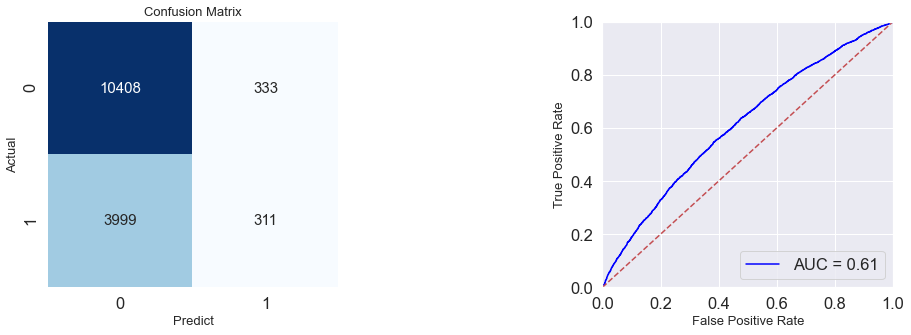


Accuracy     0.71
AUC          0.61
GINI         0.22
 
           Positive      Negative
Num case    10741          4310
Precision    0.72          0.48
Recall       0.97          0.07
F1           0.83          0.13


In [31]:
#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix

def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    auc = sklm.roc_auc_score(labels, probs[:,1])
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    
    fig = plt.figure(figsize=(13,5))
    ax1 = plt.subplot(121)
    sns.heatmap(conf, annot=True ,fmt='g',cmap = "Blues", annot_kws={"size":15}, cbar = False, ax =ax1)
    ax1.set_title("Confusion Matrix", fontsize = 13)
    ax1.set_xlabel("Predict", fontsize = 13)
    ax1.set_ylabel("Actual", fontsize = 13)
    
    
    ax2 = plt.subplot(122)
    ax2.plot(fpr, tpr, color = 'blue', label = 'AUC = %0.2f' % auc)
    ax2.legend(loc = 'lower right')
    ax2.plot([0, 1], [0, 1],'r--')
    ax2.set_xlim([0, 1])
    ax2.set_ylim([0, 1])
    ax2.set_ylabel('True Positive Rate', fontsize = 13)
    ax2.set_xlabel('False Positive Rate', fontsize = 13)
    plt.tight_layout(w_pad = 12)
    plt.show();
   

    print('')
    print('Accuracy     %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC          %0.2f' % auc)
    print('GINI         %0.2f' % (2*auc-1))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
print_metrics(y_test, lr_proba, 0.5)  

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


#### Hyperparameter tuning for random forest

In [32]:
param_grid = {
    "n_estimators" : [300,350],
    "max_depth" : [70,80],
    "max_features" : [10,15]
}

rf_clf = GridSearchCV(RandomForestClassifier(),param_grid = param_grid, cv = 5, verbose = 1, n_jobs = -1)

best_rf_clf = rf_clf.fit(X_train,y_train)

print("Best Estimator :",best_rf_clf.best_estimator_)
print("Best Score :", best_rf_clf.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Estimator : RandomForestClassifier(max_depth=70, max_features=15, n_estimators=350)
Best Score : 0.7204692554272538


In [34]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set
rf = RandomForestClassifier(n_estimators= 350, max_depth = 70, max_features = 15, random_state = 42)

RandomForestClassifier(max_depth=70, max_features=15, n_estimators=350,
                       random_state=42)

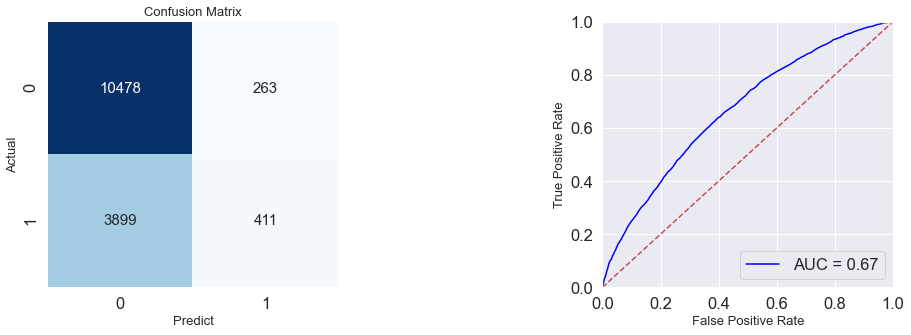


Accuracy     0.72
AUC          0.67
GINI         0.33
 
           Positive      Negative
Num case    10741          4310
Precision    0.73          0.61
Recall       0.98          0.10
F1           0.83          0.16


In [35]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model

rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)

rf_proba = rf.predict_proba(X_test)


#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix

print_metrics(y_test, rf_proba, 0.5)

<mark>__Result:__
    
Base on the 2 model we use above, we concluded that random forest make better classification compare with logistic regression with higher AUC with 0.67 and higher accuracy 0.72

### Q4.3 Identify most important features impacting churn

#### Perform features selection using feature important

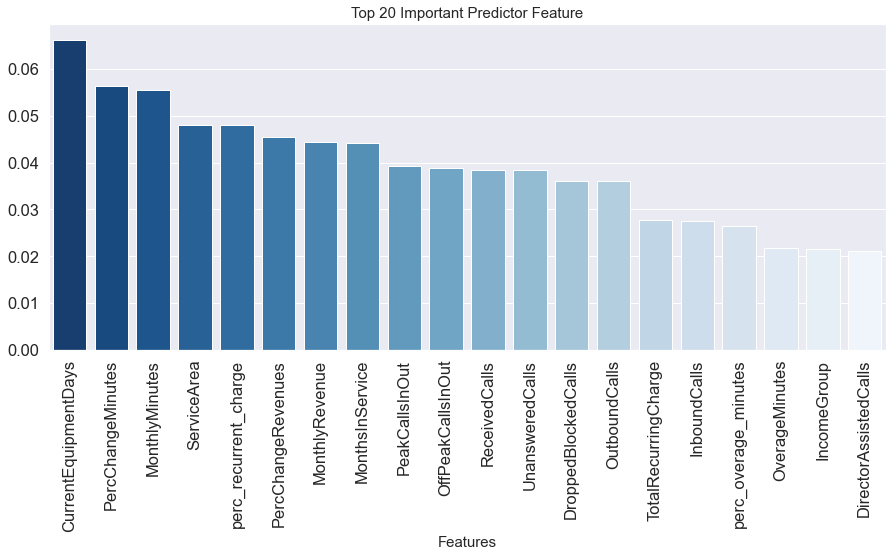

In [36]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

top_20 = pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending = False)[:20]

plt.figure(figsize = (15,6))
sns.barplot(x = top_20.index, y = top_20.values, palette = "Blues_r")
plt.title("Top 20 Important Predictor Feature", fontsize = 15)
plt.xlabel("Features", fontsize = 15)
plt.xticks(rotation = 90);

In [37]:
X1_train = X_train[top_20.index]
X1_test = X_test[top_20.index]

RandomForestClassifier(max_depth=70, max_features=15, n_estimators=350,
                       random_state=42)

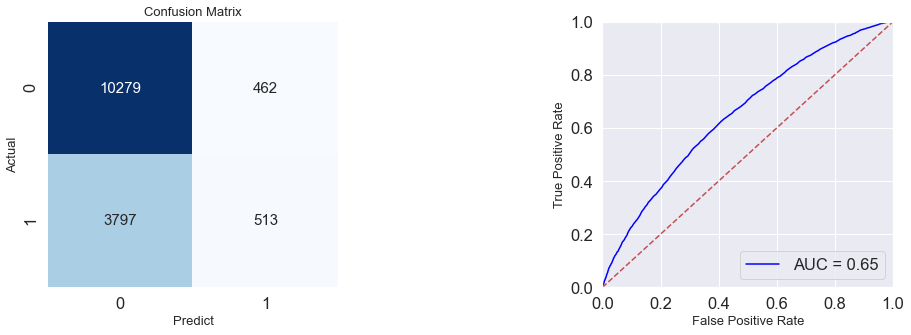


Accuracy     0.72
AUC          0.65
GINI         0.30
 
           Positive      Negative
Num case    10741          4310
Precision    0.73          0.53
Recall       0.96          0.12
F1           0.83          0.19


In [38]:
rf1 = RandomForestClassifier(n_estimators= 350, max_depth = 70, max_features = 15, random_state= 42)

rf1.fit(X1_train,y_train)

rf_pred1 = rf1.predict(X1_test)

rf_proba1 = rf1.predict_proba(X1_test)

print_metrics(y_test, rf_proba1, 0.5)

By observed the result above, model perform the same after features selection <br>
There is only slightly impact on AUC with 0.65 compare with 0.67 without feature selection

#### Features selection using variance threshold

In [39]:
# feature selection
f_select = fs.VarianceThreshold(threshold=(.8 * (1 - .8)))
X_fit = f_select.fit_transform(X)
X_reduced = X[X.columns[f_select.get_support(indices=True)]]

X_reduced.shape

(50167, 34)

RandomForestClassifier(max_depth=70, max_features=15, n_estimators=350,
                       random_state=42)

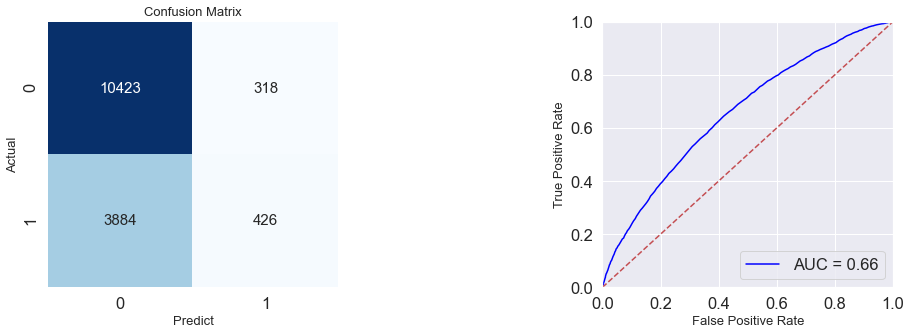


Accuracy     0.72
AUC          0.66
GINI         0.31
 
           Positive      Negative
Num case    10741          4310
Precision    0.73          0.57
Recall       0.97          0.10
F1           0.83          0.17


In [40]:
# split the reduced data
X2_train, X2_test, y2_train, y2_test = train_test_split(X_reduced, y, test_size = 0.3, random_state = 42)

# scale to normalize the data
X2_train = sc.fit_transform(X2_train)
X2_test = sc.fit_transform(X2_test)

# addding back columns name
X2_train = pd.DataFrame(X2_train, columns = X_reduced.columns)
X2_test = pd.DataFrame(X2_test, columns = X_reduced.columns)

# define the random forest classifier
rf2 = RandomForestClassifier(n_estimators= 350, max_depth = 70, max_features = 15, random_state= 42)

# train and predict after features selection and scale
rf2.fit(X2_train,y2_train)

rf_pred2 = rf2.predict(X2_test)

rf_proba2 = rf2.predict_proba(X2_test)

print_metrics(y2_test, rf_proba2, 0.5)

After evaluated 2 techniques of features selection, reducing features using variance threshold have less impact compare with using features important

## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [41]:
#Type your code here to predict churners based on the hold out data set provided
#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4

#Use "predict" function on the transformend data using the best fitted model object

holdout_df = pd.read_csv("Mini_project_3_Hold_Out_Data.xls")
holdout_df.head()
print("Total Missing Row:",holdout_df.isna().any(axis = 1).sum(),"\n")
print(holdout_df.shape)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,61.3,1.7,0.3,55.3,46.3,6.3,83.7,157.0,9.3,0.0,5.7,56,1,1,MILMIL414,7,6,240,30.0,0.0,No,No,Yes,Yes,Yes,Unknown,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,77.0,8.7,0.0,106.3,14.7,0.7,97.3,90.3,10.3,0.0,0.0,57,1,1,NNYSYR315,6,4,434,56.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,Yes,No,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,176.0,11.3,0.3,213.9,103.3,0.3,238.3,192.3,15.7,0.0,4.0,55,1,1,MILMIL414,3,3,700,38.0,24.0,No,No,No,No,No,Unknown,No,No,No,No,No,No,0,0,Yes,No,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,17.3,0.0,0.0,33.1,8.0,4.7,48.3,7.0,2.7,0.0,0.3,59,3,2,SLCSLC801,6,5,48,46.0,0.0,Yes,No,Yes,Yes,Yes,Known,Yes,Yes,Yes,No,No,Yes,0,0,No,Yes,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,43.7,4.3,0.0,490.1,50.7,8.3,189.3,105.0,8.7,0.0,4.3,52,1,1,OKCTUL918,4,4,408,58.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,3,No,0,10,No,1-Highest,Suburban,Other,No


Total Missing Row: 20000 

(20000, 58)


#### Process the hold out data set

In [42]:
# find the missing value in hold out data
holdout_missing_value = round(holdout_df.isnull().sum()*100/ len(holdout_df),2)

for k,v in holdout_missing_value.items():
    if v != 0:
        print(f"{k: <21} ", f" {v: >10}")

Churn                        100.0
MonthlyRevenue                 0.3
MonthlyMinutes                 0.3
TotalRecurringCharge           0.3
DirectorAssistedCalls          0.3
OverageMinutes                 0.3
RoamingCalls                   0.3
PercChangeMinutes             0.68
PercChangeRevenues            0.68
ServiceArea                   0.02
AgeHH1                        1.68
AgeHH2                        1.68


In [43]:
# drop the columns follow the training set and drop the churn columns
drop_list2 = ["CustomerID", "MaritalStatus", "HandsetPrice", "AgeHH1", "AgeHH2", "Churn","DroppedCalls", "BlockedCalls"]

holdout_df = holdout_df.drop(drop_list2 ,axis = 1)
holdout_df.shape

(20000, 50)

In [44]:
# fill the null value and check the result
nan_col2 = holdout_df.columns[holdout_df.isnull().any() == True]

for i in nan_col2:
    if holdout_df[i].dtype == "float64" or holdout_df[i].dtype == "int64":
        holdout_df[i] = holdout_df[i].fillna(holdout_df[i].mean())
    else:
        holdout_df[i] = holdout_df[i].fillna(holdout_df[i].mode()[0])
        
holdout_df.isnull().sum().sum()

0

In [45]:
# create features using pre-defined function
holdout_df = create_features(holdout_df)
holdout_df.head(2)
holdout_df.shape

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,61.3,1.7,0.3,55.3,46.3,6.3,83.7,157.0,9.3,0.0,5.7,56,1,1,MILMIL414,7,6,240,No,No,Yes,Yes,Yes,Unknown,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,5,No,1,No,5-Low,Other,Other,1.0,0.643590,0.047619
1,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,77.0,8.7,0.0,106.3,14.7,0.7,97.3,90.3,10.3,0.0,0.0,57,1,1,NNYSYR315,6,4,434,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,Yes,No,0,6,No,2,No,1-Highest,Other,Professional,1.0,1.303639,0.000000


(20000, 53)

In [46]:
# check the missing value again
holdout_missing = holdout_df.isnull().sum()

for k, v in holdout_missing.items():
    if v != 0:
        print(k,v)

perc_recurrent_charge 2
perc_overage_minutes 294


In [47]:
# fill the missing value with 0
holdout_df.fillna(0, inplace = True)
holdout_df.isnull().sum().sum()

0

In [48]:
le = LabelEncoder()

cols_list2 = holdout_df.select_dtypes(include = "object").columns
cols_list2

for name in cols_list2:
    holdout_df[name] = le.fit_transform(holdout_df[name].astype(str))
    
holdout_df.head()

Index(['ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam',
       'CreditRating', 'PrizmCode', 'Occupation'],
      dtype='object')

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,61.3,1.7,0.3,55.3,46.3,6.3,83.7,157.0,9.3,0.0,5.7,56,1,1,311,7,6,240,0,0,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,5,0,1,0,4,0,3,1.000000,0.643590,0.047619
1,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,77.0,8.7,0.0,106.3,14.7,0.7,97.3,90.3,10.3,0.0,0.0,57,1,1,388,6,4,434,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,6,0,2,0,0,0,4,1.000000,1.303639,0.000000
2,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,176.0,11.3,0.3,213.9,103.3,0.3,238.3,192.3,15.7,0.0,4.0,55,1,1,311,3,3,700,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,4,0,3,0,2,2,1,1.000000,0.513663,0.404235
3,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,17.3,0.0,0.0,33.1,8.0,4.7,48.3,7.0,2.7,0.0,0.3,59,3,2,636,6,5,48,1,0,1,1,1,0,1,1,1,0,0,1,0,0,0,1,0,4,0,1,0,0,0,3,0.666667,0.842933,0.104575
4,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,43.7,4.3,0.0,490.1,50.7,8.3,189.3,105.0,8.7,0.0,4.3,52,1,1,500,4,4,408,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,3,0,0,0,0,2,3,1.000000,0.904650,0.000000


In [49]:
# check the columns remain in after features reduce in random forest
remain_col = X_reduced.columns
remain_col

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'UnansweredCalls',
       'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls',
       'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut',
       'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls',
       'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'ServiceArea',
       'Handsets', 'CurrentEquipmentDays', 'ChildrenInHH', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'HasCreditCard',
       'IncomeGroup', 'CreditRating', 'PrizmCode', 'Occupation'],
      dtype='object')

In [50]:
# get the columns that necessary follow feature selection process
new_holdout={}

for i in remain_col:
    new_holdout[i] = holdout_df[i]

new_holdout = pd.DataFrame(new_holdout)
new_holdout.head()
new_holdout.shape

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,CurrentEquipmentDays,ChildrenInHH,Homeownership,BuysViaMailOrder,RespondsToMailOffers,HasCreditCard,IncomeGroup,CreditRating,PrizmCode,Occupation
0,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,61.3,1.7,0.3,55.3,46.3,6.3,83.7,157.0,9.3,0.0,5.7,56,1,1,311,7,240,0,1,1,1,1,5,4,0,3
1,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,77.0,8.7,0.0,106.3,14.7,0.7,97.3,90.3,10.3,0.0,0.0,57,1,1,388,6,434,0,0,0,0,1,6,0,0,4
2,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,176.0,11.3,0.3,213.9,103.3,0.3,238.3,192.3,15.7,0.0,4.0,55,1,1,311,3,700,0,1,0,0,0,4,2,2,1
3,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,17.3,0.0,0.0,33.1,8.0,4.7,48.3,7.0,2.7,0.0,0.3,59,3,2,636,6,48,1,0,1,1,1,4,0,0,3
4,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,43.7,4.3,0.0,490.1,50.7,8.3,189.3,105.0,8.7,0.0,4.3,52,1,1,500,4,408,0,0,1,1,1,3,0,2,3


(20000, 34)

#### Predict the holdout data with best model

In [51]:
# scale the holdout data set
new_holdout = sc.fit_transform(new_holdout)
new_holdout.shape

# make the prediction using random forest with features selection
rf_pred3 = rf2.predict(new_holdout)

rf_proba3 = rf2.predict_proba(new_holdout)

(20000, 34)

From the model evaluation done above, we choose random forest with features selection using variance threshold as our model

In [52]:
# calculate the number of churn and non-churn
no_churn = []
churn = []

for i in rf_pred3:
    if i == 1:
        churn.append(i)
    else:
        no_churn.append(i)

len(no_churn)
len(churn)

19084

916

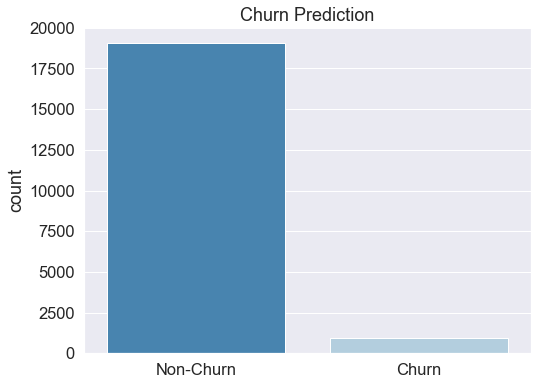

In [53]:
# plot the result
plt.figure(figsize = (8,6))
ax = sns.countplot(rf_pred3, palette= "Blues_r")
ax.set( title = "Churn Prediction")
ax.set_xticklabels(["Non-Churn","Churn"])
plt.show();

## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

In [54]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)

lift_df = pd.DataFrame({"Churner": y2_test, "Probabilities": rf_proba2[:,1]}, columns=["Churner", "Probabilities"])
lift_df.head()
lift_df.shape

,Churner,Probabilities
17563,1,0.328571
35651,0,0.274286
45623,0,0.111429
22488,1,0.420000
4334,1,0.368571


(15051, 2)

In [55]:
lift_df["decile_group"] = pd.qcut(lift_df["Probabilities"], 10)
lift_df.head()

,Churner,Probabilities,decile_group
17563,1,0.328571,"(0.303, 0.334]"
35651,0,0.274286,"(0.271, 0.303]"
45623,0,0.111429,"(0.0075699999999999995, 0.137]"
22488,1,0.420000,"(0.403, 0.457]"
4334,1,0.368571,"(0.366, 0.403]"


In [56]:
lift_grp = lift_df.groupby("decile_group").agg(["count","sum"])["Churner"].sort_index(ascending = False)
lift_grp.columns = ["Number of customers","Number of Churn"]

lift_grp["Cumulative Chrun"] = lift_grp["Number of Churn"].cumsum()
lift_grp["Percent of Events"] = lift_grp["Number of Churn"]/lift_grp["Number of Churn"].sum()*100

lift_grp["Gain"] = lift_grp["Percent of Events"].cumsum() 
lift_grp["Lift"] = lift_grp["Gain"]/np.array(range(10,110,10))

lift_grp.head(10)

,Number of customers,Number of Churn,Cumulative Chrun,Percent of Events,Gain,Lift
decile_group,,,,,,
"(0.457, 0.751]",1468,761,761,17.656613,17.656613,1.765661
"(0.403, 0.457]",1496,597,1358,13.851508,31.508121,1.575406
"(0.366, 0.403]",1467,526,1884,12.204176,43.712297,1.457077
"(0.334, 0.366]",1468,487,2371,11.299304,55.011601,1.375290
"(0.303, 0.334]",1505,445,2816,10.324826,65.336427,1.306729
"(0.271, 0.303]",1522,396,3212,9.187935,74.524362,1.242073
"(0.234, 0.271]",1601,364,3576,8.445476,82.969838,1.185283
"(0.194, 0.234]",1462,294,3870,6.821346,89.791183,1.122390
"(0.137, 0.194]",1503,270,4140,6.264501,96.055684,1.067285


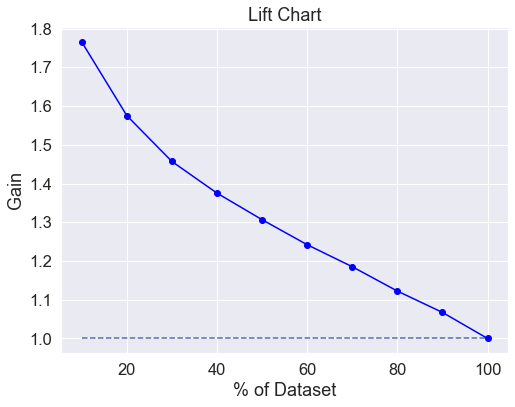

In [57]:
plt.figure(figsize= (8,6))
plt.plot(list(range(10, 110, 10)), np.repeat(1, 10), linestyle='dashed')
plt.plot(list(range(10, 110, 10)), "Lift", data = lift_grp, marker = "o", color = "blue")
plt.xlabel("% of Dataset")
plt.ylabel("Gain")
plt.title("Lift Chart");

In [58]:
top2_deciles = lift_grp.iloc[1][2]
total_customer = len(lift_df)
monthly_revenue = cust_df["MonthlyRevenue"].sum()

print("Percentage of churn captured :   ", round((top2_deciles/total_customer*100),2))
print("Monthly revenue of Top 20% churn :",round((top2_deciles/total_customer*monthly_revenue),2))

Percentage of churn captured :    9.02
Monthly revenue of Top 20% churn : 261729.83


<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?
   